In [1430]:
from qutip import *
import numpy as np
import scipy as scipy
import os
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

In [1474]:
N = 10 # Dimension of the Hilbert space of the cavity
theta = np.pi
eps = 1*np.exp(1j*theta)
gamma = 10

In [1485]:
a = destroy(N) 

H = 1j*(eps*a.dag()**2-np.conj(eps)*a**2) # Hamiltonian of the system in the squeezed basis
Lops = [np.sqrt(gamma)*a]

tau_vec = np.linspace(0,100/gamma,100000) # Time vector of delays
freqs = np.linspace(-20,20,200) # Frequencies

quad_ang = (theta+np.pi)/2
x_ang = a*np.exp(-1j*quad_ang)+a.dag()*np.exp(1j*quad_ang)

rho_0 = displace(N,1)*basis(N)
spec = np.zeros([np.size(tau_vec)])

In [1486]:
rho_ss = steadystate(H, Lops)
mean_a = expect(a,rho_ss)
mean_ad = expect(a.dag(),rho_ss)

In [1487]:
'''
t_vec = np.linspace(0,10/gamma,100) # Time vector of times
prueba = correlation_2op_2t(H, rho_0, t_vec, tau_vec, Lops, a, a, options=Options(nsteps=10000))
print(1)
prueba2 = correlation_2op_2t(H, rho_0, t_vec+tau_vec, tau_vec, Lops, a, a, options=Options(nsteps=10000))
plt.plot(prueba-prueba2)
plt.show()
'''

'\nt_vec = np.linspace(0,10/gamma,100) # Time vector of times\nprueba = correlation_2op_2t(H, rho_0, t_vec, tau_vec, Lops, a, a, options=Options(nsteps=10000))\nprint(1)\nprueba2 = correlation_2op_2t(H, rho_0, t_vec+tau_vec, tau_vec, Lops, a, a, options=Options(nsteps=10000))\nplt.plot(prueba-prueba2)\nplt.show()\n'

In [ ]:
corr_aa = correlation_2op_1t(H, None, tau_vec, Lops, a, a, options=Options(nsteps=10000))
print(1)
corr_adad = correlation_2op_1t(H, None, tau_vec, Lops, a.dag(), a.dag(), options=Options(nsteps=10000), reverse = 'True')
print(2)
corr_ada = correlation_2op_1t(H, None, tau_vec, Lops, a.dag(), a, options=Options(nsteps=10000))
print(3)
corr_aad = correlation_2op_1t(H, None, tau_vec, Lops, a.dag(), a, options=Options(nsteps=10000), reverse = 'True')

1
2
3


In [1543]:
corr = np.exp(-1j*2*quad_ang)*(corr_aa-mean_a*mean_a)+(corr_aad-mean_ad*mean_a)+(corr_ada-mean_a*mean_ad)+np.exp(1j*2*quad_ang)*(corr_adad-mean_ad*mean_ad)

In [1544]:
freqs = np.linspace(-1000,1000,1000)

In [1545]:
#freqs = np.sort(np.fft.fftfreq(np.size(tau_vec), d=1))

In [1546]:
spec = np.zeros([np.size(freqs)])
for j in range(np.size(freqs)):
    spec[j] = 2*gamma*scipy.integrate.simpson(np.cos(freqs[j]*tau_vec)*corr,x=tau_vec)

C:\Users\rodri\AppData\Local\Temp\ipykernel_21520\33226049.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  spec[j] = 2*gamma*scipy.integrate.simpson(np.cos(freqs[j]*tau_vec)*corr,x=tau_vec)


In [1547]:
exact1 = 2*gamma*np.abs(eps)/(((gamma/2)-np.abs(eps))**2+np.sort(freqs)**2) #theta/2
exact2 = -2*gamma*np.abs(eps)/(((gamma/2)+np.abs(eps))**2+np.sort(freqs)**2) #(theta+pi)/2

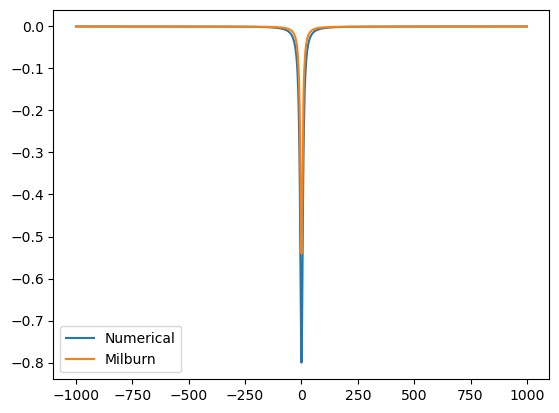

In [1548]:
plt.plot(np.sort(freqs),spec,label='Numerical')
plt.plot(np.sort(freqs),exact2,label='Milburn')
#plt.plot(freqs,np.zeros(np.size(freqs)),'--')
#plt.ylim([-1,10])
#plt.semilogy()
plt.legend()